# Object Detection Ïã§Ïäµ

AIÍ∏∞Ìôú TA ÏÜ°ÏòÅÎØº

## 1. YOLOv5 ÏÑ§ÏπòÌïòÍ∏∞

In [1]:
#@markdown ### YOLOv5 ÏÑ§ÏπòÌïòÍ∏∞
#@markdown Object DetectionÏóê ÏÇ¨Ïö©Ìï† Î™®Îç∏Ïù∏ YOLOv5Î•º ÏÑ§ÏπòÌï©ÎãàÎã§. \
#@markdown ÌòÑÏû¨ ÏúÑÏπòÏù∏ "/content" Í≤ΩÎ°úÏóê ÏÑ§ÏπòÎê©ÎãàÎã§.

!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16036, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 16036 (delta 39), reused 42 (delta 25), pack-reused 15967
Receiving objects: 100% (16036/16036), 14.61 MiB | 24.05 MiB/s, done.
Resolving deltas: 100% (11005/11005), done.


## 2. Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑÌïòÍ∏∞

In [2]:
#@markdown ### Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú
#@markdown roboflowÏóêÏÑú Ï†úÏûëÌïú Îç∞Ïù¥ÌÑ∞ÏÖã urlÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.\
#@markdown Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ "/content/yolov5" Í≤ΩÎ°úÏóê Ï†ÄÏû•Îê©ÎãàÎã§.
url = "https://app.roboflow.com/ds/y37JEYNr0Y?key=KiFrQHGDqJ" #@param {type: "string"}

%cd /content/yolov5
!curl -L {url} > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
# !curl -L "https://app.roboflow.com/ds/NB62T2GRrv?key=RvUqw0bex1" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/yolov5
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0    368      0  0:00:02  0:00:02 --:--:--   368
100  844k  100  844k    0     0   314k      0  0:00:02  0:00:02 --:--:--  314k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/ditto8_jpg.rf.5d75e2f819a774962e16d24b4cd3be48.jpg  
   creating: test/labels/
 extracting: test/labels/ditto8_jpg.rf.5d75e2f819a774962e16d24b4cd3be48.txt  
   creating: train/
   creating: train/images/
 extracting: train/images/ditto10_jpeg.rf.599166d06f49dac8098676e2d4c4288f.jpg  
 extracting: train/images/ditto10_jpeg.rf.99ea98f4d1b9d2042b89b61c4af40ec9.jpg  
 extracting: train/images/ditto10_jpeg.rf.c658e4a178366354c640cebfcaa7c1e7.jpg  
 extracting: t

In [3]:
#@markdown ### ÌïôÏäµÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î¶¨Ïä§Ìä∏ ÎßåÎì§Í∏∞
#@markdown YOLOÎ•º ÌïôÏäµÏãúÌÇ§Í∏∞ ÏúÑÌï¥ÏÑúÎäî Îç∞Ïù¥ÌÑ∞ Î¶¨Ïä§Ìä∏Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§.\
#@markdown Îç∞Ïù¥ÌÑ∞ Î¶¨Ïä§Ìä∏Î•º ÎßåÎì§Ïñ¥Ï£ºÎäî ÏΩîÎìúÏûÖÎãàÎã§.

from glob import glob

train_img_list = glob('/content/yolov5/train/images/*.jpg')
test_img_list = glob('/content/yolov5/test/images/*.jpg')
valid_img_list = glob('/content/yolov5/valid/images/*.jpg')

with open('/content/yolov5/train/images/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov5/test/images/test.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')

with open('/content/yolov5/valid/images/valid.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')

## 3. Î™®Îç∏ ÌïôÏäµÏãúÌÇ§Í∏∞

In [4]:
#@markdown ### Ï∂îÍ∞Ä Ìå®ÌÇ§ÏßÄ ÏÑ§ÏπòÌïòÍ∏∞
#@markdown Ï†ïÏÉÅÏ†ÅÏù∏ YOLO ÏÇ¨Ïö©ÏùÑ ÏúÑÌï¥ ÌïÑÏöîÌïú ÏûëÏóÖÏûÖÎãàÎã§.\
#@markdown Ïã§ÌñâÏãúÏºú Ï£ºÏÑ∏Ïöî.

%cd /content/yolov5/
!pip install -qr requirements.txt

/content/yolov5
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 190.6/190.6 kB 2.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 644.8/644.8 kB 7.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


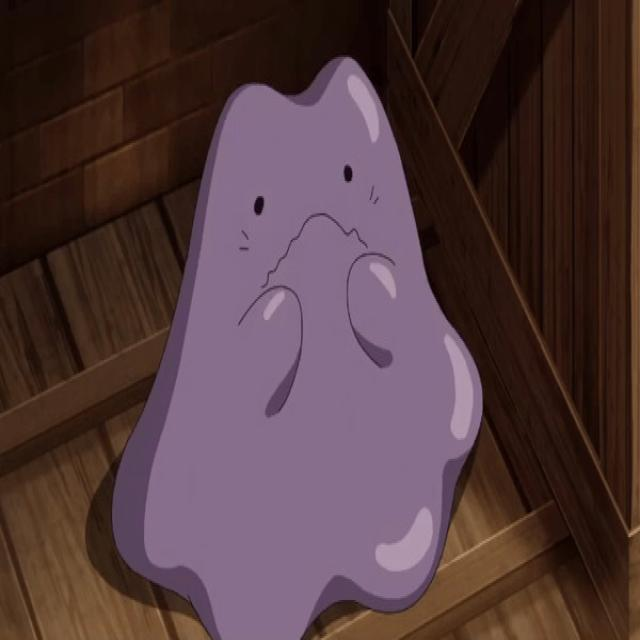

In [5]:
#@markdown ### ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ Í≤ÄÏÇ¨ÌïòÍ∏∞
#@markdown ÌÖåÏä§Ìä∏Ïóê ÏÇ¨Ïö©Ìï† Ïù¥ÎØ∏ÏßÄÎ•º Ï†ïÌïòÍ≥†, Ïù¥ÎØ∏ÏßÄÏóê Î¨∏Ï†úÍ∞Ä ÏóÜÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Îäî ÏΩîÎìúÏûÖÎãàÎã§.\
#@markdown "/content/yolov5/test/images" Í≤ΩÎ°úÏóê ÏûàÎäî jpg ÌååÏùº Ï§ë ÌïòÎÇòÎ•º Í≥®ÎùºÏÑú,\
#@markdown ÏïÑÎûòÏóê ÌååÏùºÎ™ÖÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.

import os
from PIL import Image

dir_path = '/content/yolov5/test/images'
target_img_name = "ditto8_jpg.rf.5d75e2f819a774962e16d24b4cd3be48.jpg" #@param {type: "string"}
target_img_path = os.path.join(dir_path, target_img_name)

img = Image.open(target_img_path)
display(img)

#@markdown ÏÖÄ ÌïòÎã®Ïóê Ïù¥ÎØ∏ÏßÄÍ∞Ä Ïûò Ï∂úÎ†•ÎêúÎã§Î©¥ ÏÑ±Í≥µÏûÖÎãàÎã§.

detect: weights=['yolov5s.pt'], source=/content/yolov5/test/images/ditto8_jpg.rf.5d75e2f819a774962e16d24b4cd3be48.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=untrained_exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 üöÄ v7.0-232-g1c60c53 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 84.4MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/test/images/ditto8_jpg.rf.5d75e2f819a774962e16d24b4cd3be48.jpg: 640x640 (no detections), 12.3ms
Speed: 0.6ms pre-process, 12.3ms inference, 21.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/

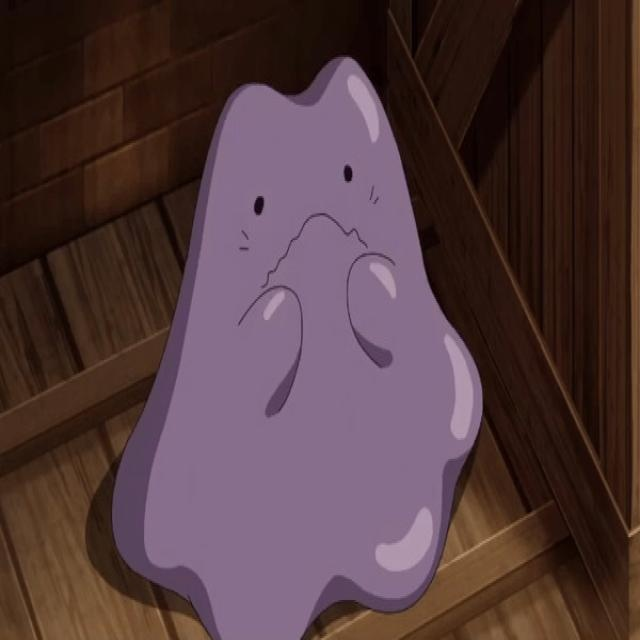

In [6]:
#@markdown ### ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ Í∞êÏßÄÌïòÍ∏∞: Ï¥àÍ∏∞ Î™®Îç∏
#@markdown Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í∏∞ Ï†Ñ Ï¥àÍ∏∞ ÏÉÅÌÉúÏóêÏÑú, ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÎ•º Ïñ¥ÎñªÍ≤å Í∞êÏßÄÌïòÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Îäî ÏΩîÎìúÏûÖÎãàÎã§.\
#@markdown Ïù¥ÎØ∏ÏßÄÏóê Îî∞Îùº Í∞êÏßÄÎê† ÏàòÎèÑ, Í∞êÏßÄÎêòÏßÄ ÏïäÏùÑ ÏàòÎèÑ ÏûàÏäµÎãàÎã§.\
#@markdown ÏÖÄ ÌïòÎã®Ïóê Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï∂úÎ†•ÎêòÍ∏∞Îßå ÌïòÎ©¥ ÏÑ±Í≥µÏûÖÎãàÎã§.

!python detect.py --source {target_img_path} --weights yolov5s.pt --conf 0.25 --name untrained_exp --exist-ok

saved_dir = '/content/yolov5/runs/detect/untrained_exp'
img = Image.open(os.path.join(saved_dir, target_img_name))
display(img)

In [ ]:
#@markdown ### Î™®Îç∏ ÌïôÏäµÏãúÌÇ§Í∏∞
#@markdown Ïù¥Ï†ú Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇµÎãàÎã§.\
#@markdown ÏïûÏóêÏÑú Ï§ÄÎπÑÌïú Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Îç∞Ïù¥ÌÑ∞ Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©ÌïòÍ≤å Îê©ÎãàÎã§.\
#@markdown ÌïôÏäµÏùÄ Îã§ÏÜå ÏãúÍ∞ÑÏù¥ ÏÜåÏöîÎê† Ïàò ÏûàÏúºÎ©∞, 199Î≤àÏß∏ EpochÍπåÏßÄ ÏàòÌñâÎêòÎ©¥ ÏÑ±Í≥µÏûÖÎãàÎã§.\
#@markdown \
#@markdown Í≤∞Í≥ºÏ∞Ω ÏµúÌïòÎã®Ïùò "Results saved to ..." Îí§Ïóê Î™ÖÏãúÎêú Í≤ΩÎ°úÍ∞Ä Î∞îÎ°ú ÌïôÏäµÎêú Í≤∞Í≥ºÍ∞Ä Ï†ÄÏû•Îêú Í≤ΩÎ°úÏûÖÎãàÎã§.\
#@markdown Îã§Ïùå Îã®Í≥ÑÏóêÏÑú ÏÇ¨Ïö©ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê, Ìï¥Îãπ Í≤ΩÎ°úÎ•º Î≥µÏÇ¨Ìï¥Îë°ÎãàÎã§.

yaml_path = '/content/yolov5/data.yaml'

!python train.py --img 640 --batch 16 --epochs 200 --data {yaml_path} --weights yolov5s.pt

2023-11-02 10:46:07.661689: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-02 10:46:07.661751: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-02 10:46:07.661798: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, work

In [ ]:
#@markdown ### ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ Í∞êÏßÄÌïòÍ∏∞: ÌïôÏäµÎêú Î™®Îç∏
#@markdown Ï≤òÏùå ÏÇ¨Ïö©ÌñàÎçò ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÎ•º Í∞ÄÏßÄÍ≥†, ÌïôÏäµÏù¥ ÏôÑÎ£åÎêú Î™®Îç∏ÏùÑ ÌÖåÏä§Ìä∏Ìï¥Î≥¥Îäî ÏΩîÎìúÏûÖÎãàÎã§.\
#@markdown Î∞îÎ°ú ÏïûÏóêÏÑú Î≥µÏÇ¨Ìïú Í≤ΩÎ°úÎ•º ÏïÑÎûò ÏûÖÎ†•Ìï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.

path_start = "/content/yolov5"
path_saved = "runs/train/exp" #@param {type: "string"}
path_end = "weights/best.pt"
best_param_path = os.path.join(path_start, path_saved, path_end)
test_datas_dir = '/content/yolov5/test/images/'

!python detect.py --source {test_datas_dir} --weights {best_param_path} --conf 0.25 --name trained_exp --exist-ok --save-conf

saved_dir = '/content/yolov5/runs/detect/trained_exp'
img = Image.open(os.path.join(saved_dir, target_img_name))
display(img)

#@markdown ÏÖÄ ÌïòÎã®Ïóê Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï∂úÎ†•ÎêòÎ©¥ ÏÑ±Í≥µÏûÖÎãàÎã§.\
#@markdown ÌïôÏäµ ÌõÑ ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÏùò Í∞ùÏ≤¥ Í∞êÏßÄÏóê Ïñ¥Îñ§ Î≥ÄÌôîÍ∞Ä ÏÉùÍ≤ºÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Î©¥ Îê©ÎãàÎã§.\
#@markdown ÏõêÌïòÎäî Í≤∞Í≥ºÍ∞Ä ÎÇòÏò§ÏßÄ ÏïäÏïòÎã§Î©¥, Îç∞Ïù¥ÌÑ∞Î•º ÎäòÎ¶¨Í±∞ÎÇò augmentationÏùÑ ÎäòÎ¶¨Îäî Îì± Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏàòÏ†ïÌï¥Ï£ºÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.

## 4. Ïã§Ï†úÎ°ú ÏÇ¨Ïö©Ìï¥Î≥¥Í∏∞

Ïù¥Ï†úÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî ÎùºÎ≤®ÎßÅÎêòÏßÄ ÏïäÏùÄ Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú,\
ÏïûÏóêÏÑú ÌïôÏäµÏãúÌÇ® Î™®Îç∏Ïóê ÎÑ£Ïñ¥ Object DetectionÏùÑ ÏßÑÌñâÌï¥Î≥¥Î†§Í≥† Ìï©ÎãàÎã§.

In [ ]:
#@markdown ### ÏÇ¨Ïö©Ìï† Ïù¥ÎØ∏ÏßÄ ÏóÖÎ°úÎìúÌïòÍ∏∞
#@markdown Object DetectionÏùÑ ÏßÑÌñâÌï† Ïù¥ÎØ∏ÏßÄÎ•º ÏóÖÎ°úÎìúÌï©ÎãàÎã§.\
#@markdown ÎèôÏãúÏóê Ïó¨Îü¨ ÌååÏùºÎèÑ ÏóÖÎ°úÎìú Í∞ÄÎä•ÌïòÎãà Ïã§ÏäµÌï¥Î≥¥Í≥† Ïã∂ÏùÄ Ïù¥ÎØ∏ÏßÄÎ•º ÌïúÍ∫ºÎ≤àÏóê Ïò¨Î†§Ï£ºÏÑ∏Ïöî.\
#@markdown Ïã§Ìñâ Ïãú ÏïÑÎûò Ïã§ÌñâÏ∞ΩÏóê ÌååÏùº ÏÑ†ÌÉù Î≤ÑÌäºÏù¥ ÎÇòÌÉÄÎÇ©ÎãàÎã§.\
#@markdown ÏóÖÎ°úÎìúÎêú Ïù¥ÎØ∏ÏßÄÎäî "/content/yolov5" Í≤ΩÎ°úÏóê Ï†ÄÏû•Îê©ÎãàÎã§.

from google.colab import files

%cd /content/yolov5
uploaded = files.upload()

In [ ]:
#@markdown ### Object Detection Ï†ÅÏö©Ìï¥Î≥¥Í∏∞
#@markdown Î∞©Í∏à ÏóÖÎ°úÎìúÌïú ÌååÏùºÏùò Ïù¥Î¶ÑÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.

target_img_name = 'multiple_ditto.jpeg' #@param {type: "string"}
!python detect.py --source {target_img_name} --weights {best_param_path} --conf 0.25 --name trained_exp --exist-ok --save-conf

saved_dir = '/content/yolov5/runs/detect/trained_exp'
img = Image.open(os.path.join(saved_dir, target_img_name))
display(img)

#@markdown ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ïã§ÌñâÎêòÎ©¥, ÏÖÄ ÌïòÎã®Ïóê Í∞êÏßÄ Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎÇòÌÉÄÎÇòÍ≤å Îê©ÎãàÎã§.